In [9]:
import vk
session = vk.Session(access_token='60ef112660ef112660ef112689608209fe660ef60ef11263d62ac435ca5b7d42d7fd64c')
vk_api = vk.API(session, v='5.103')
group = 'tpu_vershinina37'
m = vk_api.groups.getMembers(group_id = group)

In [10]:
import time
members = m['items']
count_members = m['count'] // 1000  # т.к. максимальное число членов возвращаемое 1 запросом 1 тысяча, нам необходимо узнать сколько запросов необходимо сделать
for i in range(1, count_members+1):
    members1000 = vk_api.groups.getMembers(group_id=group, offset=i*1000)['items'] # считываем очередную 1000 членов сообщества
    members +=members1000 # прибавляем 1000 к уже имеющимся id членов сообщества
    time.sleep(0.5)
    
print('Количество участников в сообществе {0}: {1}'.format(group,len(members)))

Количество участников в сообществе tpu_vershinina37: 470


In [11]:
# Function for looking up at user data
def extract_user_data(user):
    status = vk_api.users.get(user_id = user).pop()
    return status

In [14]:
#Предварительная обработка данных
import time
number_private = 0 # счетчик закрытых профилей
number_deactivated = 0 # счетчик удаленных или забанненых пользователей
for m_key in members:
    status = extract_user_data(m_key)
    for status_key in status.keys(): # берем нужное нам поле приватности
        if status_key == 'is_closed': # проверяем является ли профиль закрытым или нет
            if status[status_key] == True:
                number_private += 1
                members.remove(m_key)
                continue
        if status_key == 'deactivated': # проверяем является ли профиль удаленным или заблокированным
            number_deactivated += 1
            members.remove(m_key)
            continue
            
print('Количество приватных профилей в сообществе: ' + str(number_private))
print('Количество удаленных или забанненых профилей в сообществе: ' + str(number_deactivated))
print('Оставшиеся профили: ' + str(len(members)))
print('Проверочная сумма:'+str(number_private+number_deactivated+len(members)))

Количество приватных профилей в сообществе: 0
Количество удаленных или забанненых профилей в сообществе: 0
Оставшиеся профили: 399
Проверочная сумма:399


In [15]:
# Function for looking up at user data
def extract_friends_data(user):
    status = vk_api.friends.get(user_id = user)['items']
    return status

In [16]:
# получаем список всех друзей для каждого члена сообщества
from collections import defaultdict
friends_dict = defaultdict(list) # специальный словарь, где каждому ключу соответсвует list значений
number_errors = 0 # счетчик неуспешно проанализированных пользователей на подписки
for m_key in members:
    friends = []
    try:
        friends = extract_friends_data(m_key)
        for i in friends:
            if i in members:
                friends_dict[m_key].append(i)
    except Exception:
        number_errors += 1

In [17]:
number_errors

0

In [18]:
# Function for looking up at user data
def extract_features(user):
    status = vk_api.users.get(user_id = user, fields = 'sex, bdate, city, country').pop() 
    return status

In [19]:
from collections import defaultdict
import time
number_errors = 0 # счетчик неуспешно проанализированных пользователей на подписки
number_success = 0 # счетчик успешно проанализированных пользователей на подписки
users_dict = defaultdict(dict) # специальный словарь, где каждому ключу соответсвует dict значений
for m_key in members:
    try:
        user = extract_features(m_key)
        print(user)
        u_dict = {}
        if 'sex' in user:
            u_dict['sex'] = user['sex']
        else:
            u_dict['sex'] = 0
        if 'bdate' in user:
            u_dict['bdate'] = user['bdate']
        else:
            u_dict['bdate'] = 0
        if 'city' in user:
            u_dict['city'] = user['city']['title']
        else:
            u_dict['city'] = 0
        if 'country' in user:
            u_dict['country'] = user['country']['title']
        else:
            u_dict['country'] = 0
        users_dict[m_key] = u_dict
        number_success += 1
    except Exception:
        number_errors += 1
    
print('Общее количество человек в словаре: ' + str(len(users_dict.keys())))
print('Количество ошибок при обработке пользователей: ' + str(number_errors))
print('Количество успешно обработанных пользователей: ' + str(number_success))

{'id': 3376422, 'first_name': 'Dasha', 'last_name': 'Efanova', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'bdate': '2.6', 'city': {'id': 144, 'title': 'Tomsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 5402675, 'first_name': 'Dmitry', 'last_name': 'Shevchenko', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'bdate': '4.12.1977', 'city': {'id': 144, 'title': 'Tomsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 7334648, 'first_name': 'Fyodor', 'last_name': 'Kryukov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'bdate': '30.1.1993', 'city': {'id': 97, 'title': 'Novokuznetsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 14183639, 'first_name': 'Dmitry', 'last_name': 'Muravyov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'bdate': '28.4.1994', 'city': {'id': 99, 'title': 'Novosibirsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 14254804, 'first_name': 'Elizaveta', 'last_name': 'Artemyeva', 'is_closed': False, 'can_acce

{'id': 43621382, 'first_name': 'Alexey', 'last_name': 'Ovchinnikov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'bdate': '25.6.1995', 'city': {'id': 258, 'title': 'Yurga'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 44350096, 'first_name': 'Nikita', 'last_name': 'Zhurbich', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'bdate': '21.3', 'city': {'id': 144, 'title': 'Tomsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 44496950, 'first_name': 'Vanya', 'last_name': 'Boyun', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'bdate': '30.6.1996', 'city': {'id': 144, 'title': 'Tomsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 44606303, 'first_name': 'Diana', 'last_name': 'Gerdt', 'is_closed': False, 'can_access_closed': True, 'sex': 1}
{'id': 44697175, 'first_name': 'Yulia', 'last_name': 'Pitko', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'bdate': '16.5', 'city': {'id': 134, 'title': 'Stavropol'}, 'country': {'id': 1, 'title': 'Ru

{'id': 62334362, 'first_name': 'Alexander', 'last_name': 'Vinogradov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 62761167, 'first_name': 'Andrey', 'last_name': 'Filyukov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'bdate': '7.6.1995', 'country': {'id': 1, 'title': 'Russia'}}
{'id': 63325739, 'first_name': 'Igor', 'last_name': 'Kulakov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'city': {'id': 144, 'title': 'Tomsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 64116581, 'first_name': 'Mikhail', 'last_name': 'Senchenko', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'bdate': '2.11', 'city': {'id': 144, 'title': 'Tomsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 65356801, 'first_name': 'Lena', 'last_name': 'Kapustina', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'bdate': '22.4', 'city': {'id': 144, 'title': 'Tomsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id'

{'id': 84996481, 'first_name': 'Stanislav', 'last_name': 'Chernyshkin', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'bdate': '2.11'}
{'id': 85323653, 'first_name': 'Mikhail', 'last_name': 'Tumanov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'city': {'id': 144, 'title': 'Tomsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 85957165, 'first_name': 'Dmitry', 'last_name': 'Dubrovsky', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'city': {'id': 99, 'title': 'Novosibirsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 87678367, 'first_name': 'Maria', 'last_name': 'Gaydabrus', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'bdate': '30.8'}
{'id': 89335817, 'first_name': 'Yana', 'last_name': 'Belousova', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'bdate': '18.8', 'city': {'id': 144, 'title': 'Tomsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 90013736, 'first_name': 'Alyona', 'last_name': 'Ivanova', 'is_closed': False

{'id': 122523359, 'first_name': 'Varvara', 'last_name': 'Struzhina', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'bdate': '15.5.2000'}
{'id': 130479476, 'first_name': 'Ivan', 'last_name': 'Sushkov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 132201114, 'first_name': 'Anastasia', 'last_name': 'Kochenovskaya', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'bdate': '12.12.1997', 'city': {'id': 144, 'title': 'Tomsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 133383224, 'first_name': 'Vlad', 'last_name': 'Larkin', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'bdate': '5.12.1997', 'city': {'id': 2, 'title': 'Saint Petersburg'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 133916101, 'first_name': 'Ksenia', 'last_name': 'Ponomaryova', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'bdate': '6.2', 'city': {'id': 144, 'title': 'Tomsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{

{'id': 154687811, 'first_name': 'Danil', 'last_name': 'Fomin', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'city': {'id': 99, 'title': 'Novosibirsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 155365123, 'first_name': 'Kirill', 'last_name': 'Nekrasov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'bdate': '10.5', 'city': {'id': 144, 'title': 'Tomsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 155533869, 'first_name': 'Artem', 'last_name': 'Zhilenkov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'bdate': '14.1', 'city': {'id': 144, 'title': 'Tomsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 156236045, 'first_name': 'Anastasia', 'last_name': 'Rekichinskaya', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'bdate': '7.2', 'city': {'id': 144, 'title': 'Tomsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 156555639, 'first_name': 'Alexander', 'last_name': 'Vorobyov', 'is_closed': False, 'can_access_closed': True, 'sex': 2

{'id': 179548647, 'first_name': 'Anastasia', 'last_name': 'Oleynik', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'bdate': '21.3.2000', 'city': {'id': 144, 'title': 'Tomsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 179797785, 'first_name': 'Igor', 'last_name': 'Koloskov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'bdate': '4.7', 'city': {'id': 144, 'title': 'Tomsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 180727928, 'first_name': 'Ruzia', 'last_name': 'Kelsingazina', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'city': {'id': 144, 'title': 'Tomsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 181155128, 'first_name': 'Dmitry', 'last_name': 'Salogub', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'bdate': '6.7.1998', 'city': {'id': 144, 'title': 'Tomsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 181235942, 'first_name': 'Maria', 'last_name': 'Sadokhina', 'is_closed': False, 'can_access_closed': True, 'sex': 1,

{'id': 210446674, 'first_name': 'Irina', 'last_name': 'Danilova', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'bdate': '28.9.1996', 'country': {'id': 1, 'title': 'Russia'}}
{'id': 211179716, 'first_name': 'Evgenia', 'last_name': 'Konovalova', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'bdate': '31.12'}
{'id': 215349810, 'first_name': 'Alexey', 'last_name': 'Razumnov', 'is_closed': False, 'can_access_closed': True, 'sex': 2}
{'id': 217214565, 'first_name': 'Kirill', 'last_name': 'Kazarin', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'bdate': '18.3', 'city': {'id': 144, 'title': 'Tomsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 219379896, 'first_name': 'Mikhail', 'last_name': 'Ryzhov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'bdate': '5.9.1997', 'city': {'id': 144, 'title': 'Tomsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 220852325, 'first_name': 'Ekaterina', 'last_name': 'Zaikina', 'is_closed': False, 'can_access_

{'id': 264012866, 'first_name': 'Eraly', 'last_name': 'Akhmetov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'bdate': '14.8', 'city': {'id': 183, 'title': 'Almaty'}, 'country': {'id': 4, 'title': 'Kazakhstan'}}
{'id': 264185237, 'first_name': 'Amina', 'last_name': 'Samazhanova', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'bdate': '24.1.2001', 'country': {'id': 1, 'title': 'Russia'}}
{'id': 267720348, 'first_name': 'Imamidin', 'last_name': 'Kutbidinov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'bdate': '23.6', 'city': {'id': 1, 'title': 'Moscow'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 268323648, 'first_name': 'Vadim', 'last_name': 'Ozhogin', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'city': {'id': 144, 'title': 'Tomsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 269337719, 'first_name': 'Mikhail', 'last_name': 'Tarakanov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'bdate': '27.2.1997', 'city': {'id

{'id': 366235060, 'first_name': 'Vladimir', 'last_name': 'Leonov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'bdate': '9.8', 'city': {'id': 2, 'title': 'Saint Petersburg'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 367241179, 'first_name': 'Arslan', 'last_name': 'Kerimov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'bdate': '23.12', 'city': {'id': 144, 'title': 'Tomsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 373019909, 'first_name': 'Nurbek', 'last_name': 'Dootkulov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'bdate': '11.7'}
{'id': 376871166, 'first_name': 'Nurbek', 'last_name': 'Kenzhetaev', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'bdate': '18.2.1994', 'city': {'id': 144, 'title': 'Tomsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 383817102, 'first_name': 'Aryuna', 'last_name': 'Radnaeva', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'bdate': '3.8.2000', 'country': {'id': 1, 'title': 'Russ

In [20]:
import pandas as pd
df = pd.DataFrame(users_dict).T
df.to_csv('buffer_vk_1.csv')

In [ ]:
df = pd.read_csv('buffer_vk.csv') # read data recorded dataset

In [68]:
import numpy as np # работать работает, но надо ли???
df['city'] = df['city'].replace('Not specified',100)
# df['bdate'] = df['bdate'].replace(0, np.nan)
# df['country'] = df['country'].replace(0, 'Not specified')
# df['age'] = df['age'].replace(np.nan, 0)

In [67]:
df.head(10)

,sex,city,country,age,cluster
3376422,1,51,6,0.0,1
5402675,2,51,6,42.0,0
7334648,2,29,6,26.0,0
14183639,2,30,6,25.0,0
14254804,1,28,5,0.0,1
18145150,2,41,9,0.0,1
18433828,2,51,6,0.0,1
21897883,2,51,6,0.0,1
22180250,1,51,6,0.0,1
22432972,2,51,6,27.0,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 3376422 to 509072073
Data columns (total 4 columns):
sex        399 non-null object
city       399 non-null object
country    399 non-null object
age        399 non-null float64
dtypes: float64(1), object(3)
memory usage: 15.6+ KB


In [48]:
df['bdate'] = df['bdate'].astype(str)

In [49]:
def get_age (date):
    if len(date) > 5:
        age = 2019 - int(date[-4:])
    else:
        age = None
    return age

df['age'] = df.apply(lambda row: get_age(row['bdate']), axis=1)

In [54]:
del df['bdate']

In [52]:
from sklearn.preprocessing import LabelEncoder
le_con = LabelEncoder()
df['city'] = le_con.fit_transform(df['city'].values)

TypeError: argument must be a string or number

In [40]:
com = LabelEncoder()
df['country'] = com.fit_transform(df['country'].values)

In [69]:
X = df[['sex', 'age', 'city']].values

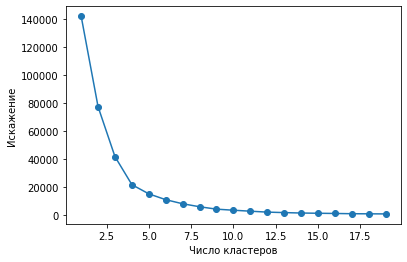

In [70]:
from sklearn. cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
distortions = []
for i in range(1,20):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10 , max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Чиcлo кластеров')
plt.ylabel('Искажение')
plt.show()

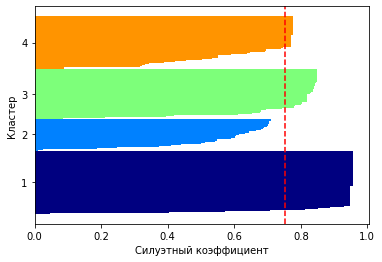

In [73]:
#Силуэтный график
km = KMeans(n_clusters= 4, init='k-means++', n_init=10, max_iter = 300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)
import numpy as пр
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower , y_ax_upper = 0 , 0
yticks = []
for i , c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters) 
    plt.barh(range(y_ax_lower , y_ax_upper) ,c_silhouette_vals ,height= 1.0 ,edgecolor = 'none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle= "--")
plt.yticks(yticks , cluster_labels + 1)
plt.ylabel('Кластер')
plt.xlabel('Силуэтный коэффициент')
plt.show()

In [80]:
from sklearn. cluster import KMeans
km = KMeans(n_clusters = 4, init = 'random',n_init= 10,max_iter=300,tol= 1e-04, random_state=0 )
y_km = km.fit_predict(X)

In [81]:
df['cluster'] = y_km.tolist()

In [82]:
df.head(10)

,sex,city,country,age,cluster
3376422,1,51,6,0.0,3
5402675,2,51,6,42.0,0
7334648,2,29,6,26.0,1
14183639,2,30,6,25.0,1
14254804,1,28,5,0.0,2
18145150,2,41,9,0.0,3
18433828,2,51,6,0.0,3
21897883,2,51,6,0.0,3
22180250,1,51,6,0.0,3
22432972,2,51,6,27.0,0


In [ ]:
#df.to_csv('ready_data_vk.csv')

In [ ]:
import pandas as pd
df = pd.read_csv('ready_data_vk.csv') # read data recorded dataset

In [111]:
dfcluster = df['cluster']

In [115]:
cluster_dict = dfcluster.to_dict()

In [117]:
len(cluster_dict)

399

In [84]:
dictOfMembers = {}
for g_key in friends_dict.keys():
    dictOfMembers[g_key]=len(friends_dict[g_key]) # переводим list id пользователей в число пользователей

In [85]:
from collections import OrderedDict
d_sorted_by_value = OrderedDict(sorted(dictOfMembers.items(), key=lambda x: x[1]))

In [104]:
count = 0
for key in reversed(d_sorted_by_value):
    user0 = key
    count += 1
    if count == 1:
        break

In [105]:
user0

58021672

In [219]:
cluster_dict[user0]

0

In [186]:
checklist = []

In [187]:
from collections import defaultdict
activated_friends = defaultdict(list) # специальный словарь, где каждому ключу соответсвует list значений
for friend in friends_dict[user0]:
    #print('{0} имеет кластер {1} а его друг {2} кластер {3}'.format(user0,cluster_dict[user0],friend, cluster_dict[friend]))
    if cluster_dict[user0] == cluster_dict[friend]:
        activated_friends[user0].append(friend)
        checklist.append(friend)

In [188]:
activated_friends

defaultdict(list,
            {58021672: [27798561,
              37236083,
              50463604,
              67261479,
              69608901,
              106184859,
              132201114,
              136741350,
              144468704,
              144726783,
              177404247,
              198052221,
              225482667,
              230017683,
              260433410,
              300237391,
              301349585,
              326922897,
              507551614]})

In [209]:
for user in activated_friends.copy().keys():
    for receivers in activated_friends[user]:
        for friend in friends_dict[receivers]:
            #print('{0} имеет кластер {1} а его друг {2} кластер {3}'.format(receivers,cluster_dict[receivers],friend, cluster_dict[friend]))
            if cluster_dict[receivers] == cluster_dict[friend]:
                if friend not in activated_friends[receivers]:
                    activated_friends[receivers].append(friend)
                    #print('{0} активирует {1}'.format(receivers,friend))
                    checklist.append(friend)

In [210]:
len(activated_friends.keys())

80

In [211]:
len(checklist)

379

In [212]:
auxiliaryList = []
for word in checklist:
    if word not in auxiliaryList:
        auxiliaryList.append(word)

In [213]:
len(auxiliaryList)

80

In [214]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

In [215]:
G.add_nodes_from(activated_friends.keys())
G.nodes()

NodeView((58021672, 27798561, 37236083, 50463604, 67261479, 69608901, 106184859, 132201114, 136741350, 144468704, 144726783, 177404247, 198052221, 225482667, 230017683, 260433410, 300237391, 301349585, 326922897, 507551614, 5402675, 25781076, 29300704, 58413959, 79677062, 138795166, 151135146, 201916291, 223917849, 269337719, 273152408, 331018628, 182544867, 219379896, 174480380, 189003810, 439272174, 68161325, 78191906, 170240273, 205162294, 171986587, 44496950, 107677570, 43621382, 160048141, 283565904, 156888487, 199231668, 351800410, 189679539, 205788460, 95291191, 121427305, 159391402, 33199925, 28579441, 76460055, 151276198, 158124402, 195795459, 376871166, 95159527, 142963908, 453640552, 22432972, 61488589, 34502554, 52617751, 169885683, 316778264, 83708548, 158991776, 502966021, 72235235, 385930876, 187420256, 95960853, 181155128, 183490326))

In [216]:
for member_key in activated_friends.keys():
    for friend_key in activated_friends[member_key]:
        G.add_edge(member_key, friend_key)

In [217]:
%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (10, 6)

C:\Users\Public\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


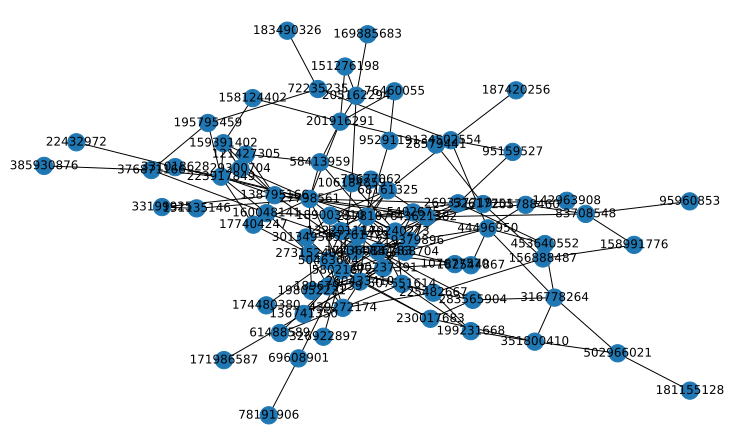

In [262]:
nx.draw(G, with_labels= True)
plt.show();

In [276]:
bb = len(activated_friends)/len((checklist)) * 100
print('% of users who probably transmitted information to the total number of users involved in the cascade: {0}'.format(bb))

% of users who probably transmitted information to the total number of users involved in the cascade: 21.108179419525065


In [273]:
cc = len(checklist)/len((members)) * 100
print('% of users who probably transmitted the information further with respect to the total number of community members: {0}'.format(cc))

% of users who probably transmitted the information further with respect to the total number of community members: 15.765391014975041


In [236]:
from sklearn.metrics.pairwise import paired_distances
for member_key in friends_dict.keys():
    for friend_key in friends_dict[member_key]:
        userA = newdf[newdf.index == member_key]
        userB = newdf[newdf.index == friend_key]
        #print(paired_distances(userA, userB, metric='euclidean'))
        distances.append(paired_distances(userA, userB, metric='euclidean'))

In [250]:
import statistics 
a = sum(distances) / len(distances)
a

array([11.54378003])

In [251]:
sum(distances)

array([72321.78191673])

In [252]:
min(distances)

array([0.])

In [253]:
max(distances)

array([86.00581376])

In [235]:
distances = []

In [232]:
newdf = df[['sex','age']]

In [233]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 3376422 to 509072073
Data columns (total 2 columns):
sex    399 non-null object
age    399 non-null float64
dtypes: float64(1), object(1)
memory usage: 9.4+ KB
